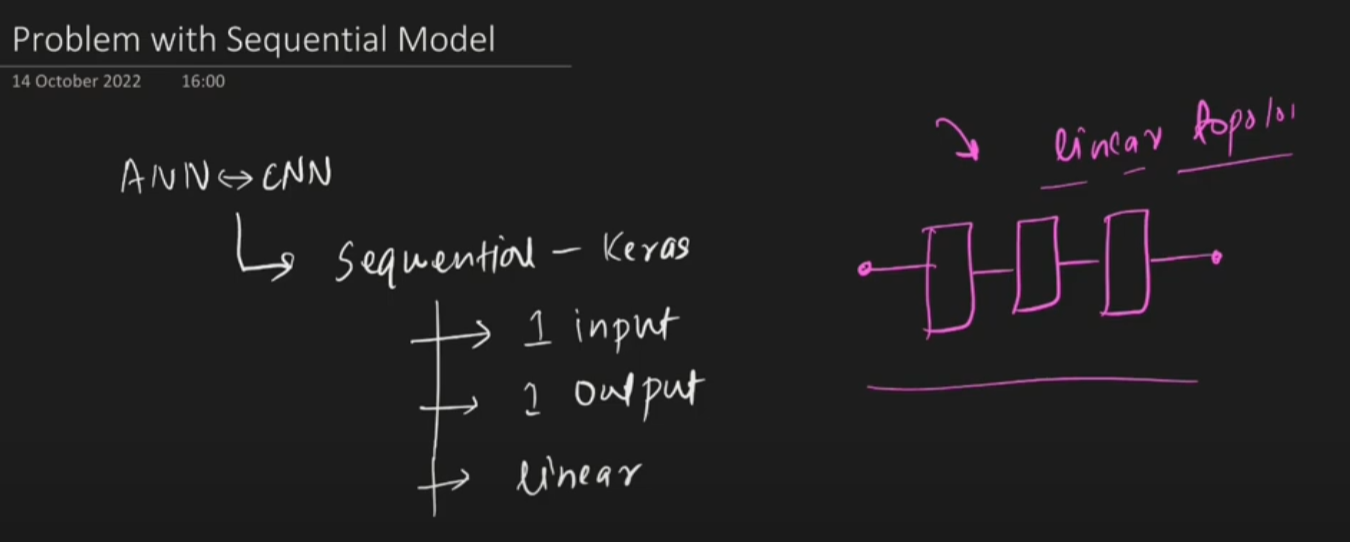

# **Scenarios where we can't use Sequential Models**

# **Scenario 1:**

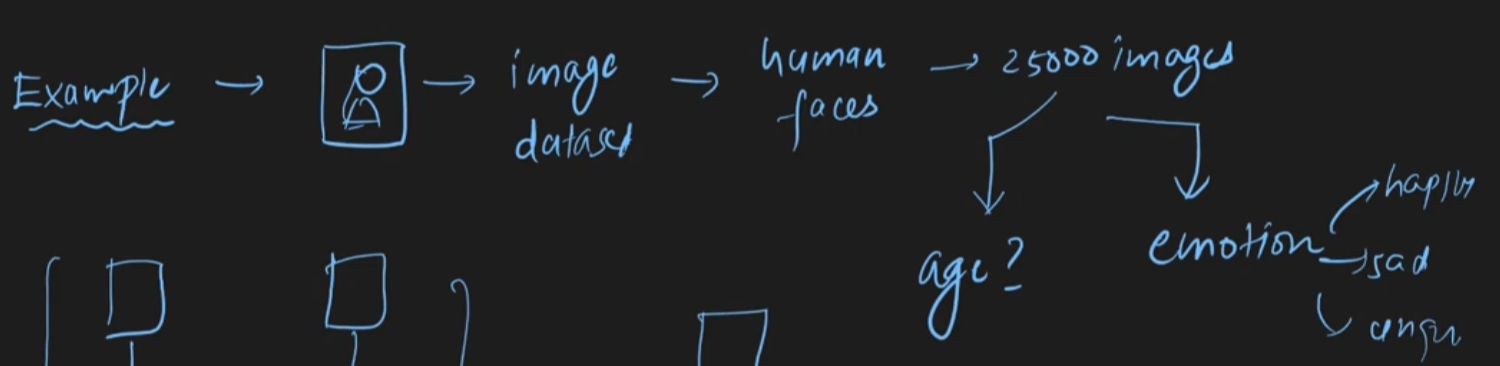

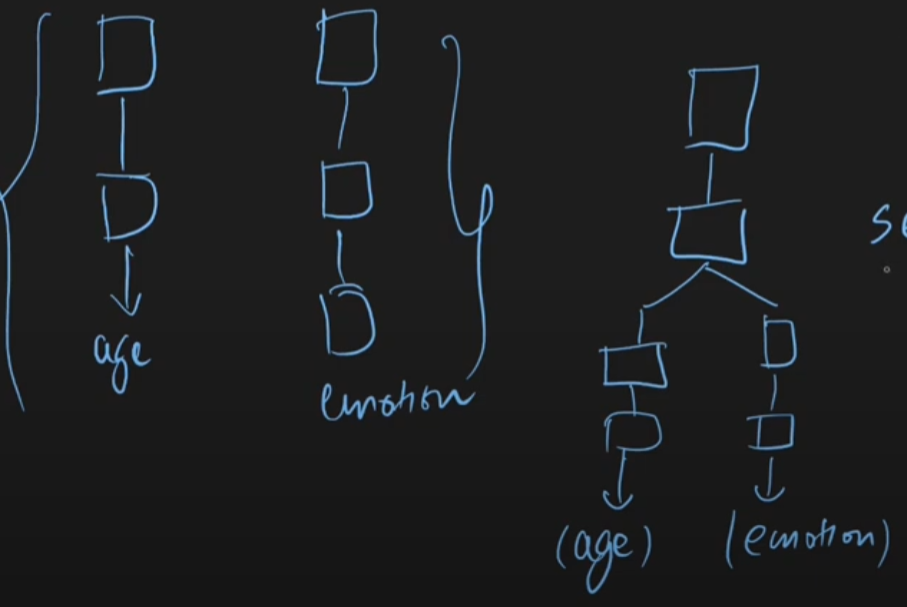

# **Scenario 2: E-COMMERCE**

`Rather than this approach where we will again make 3 models and then average the 3 prices to get the final price of the product`

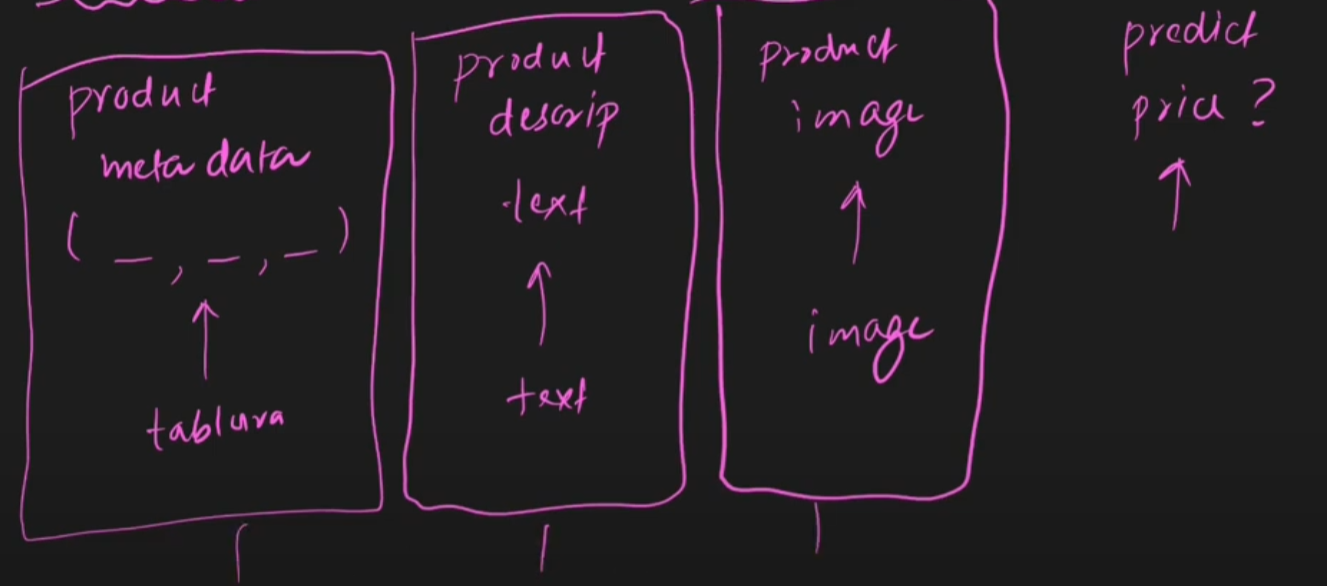

# **This is way  better approach using functional API**

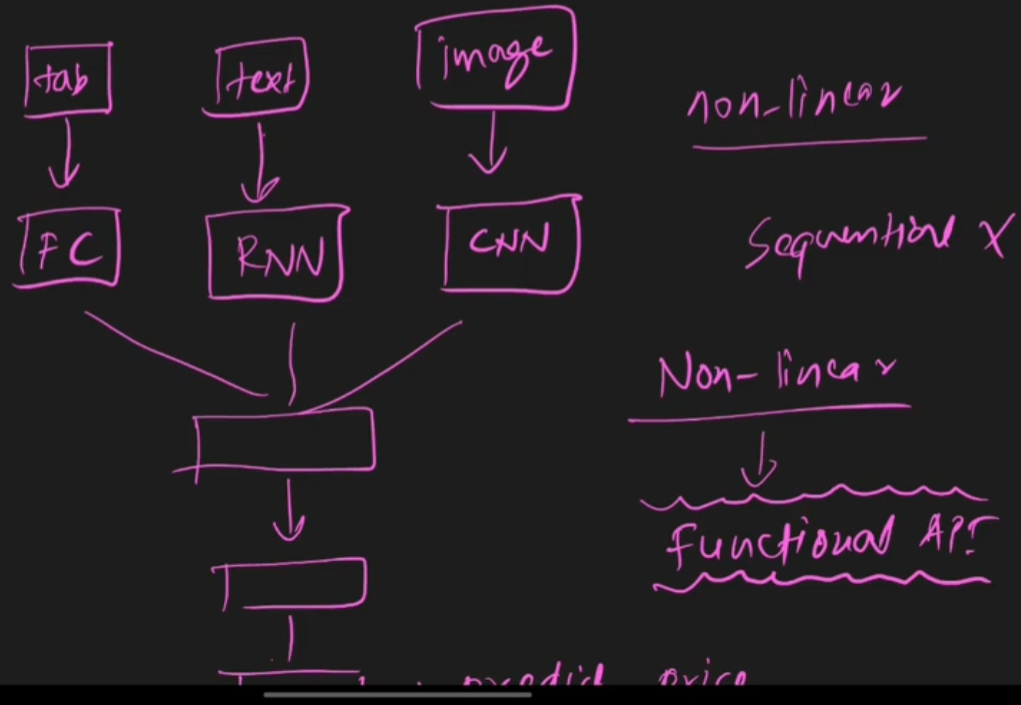

# **Making this neural network to predict the age and city**

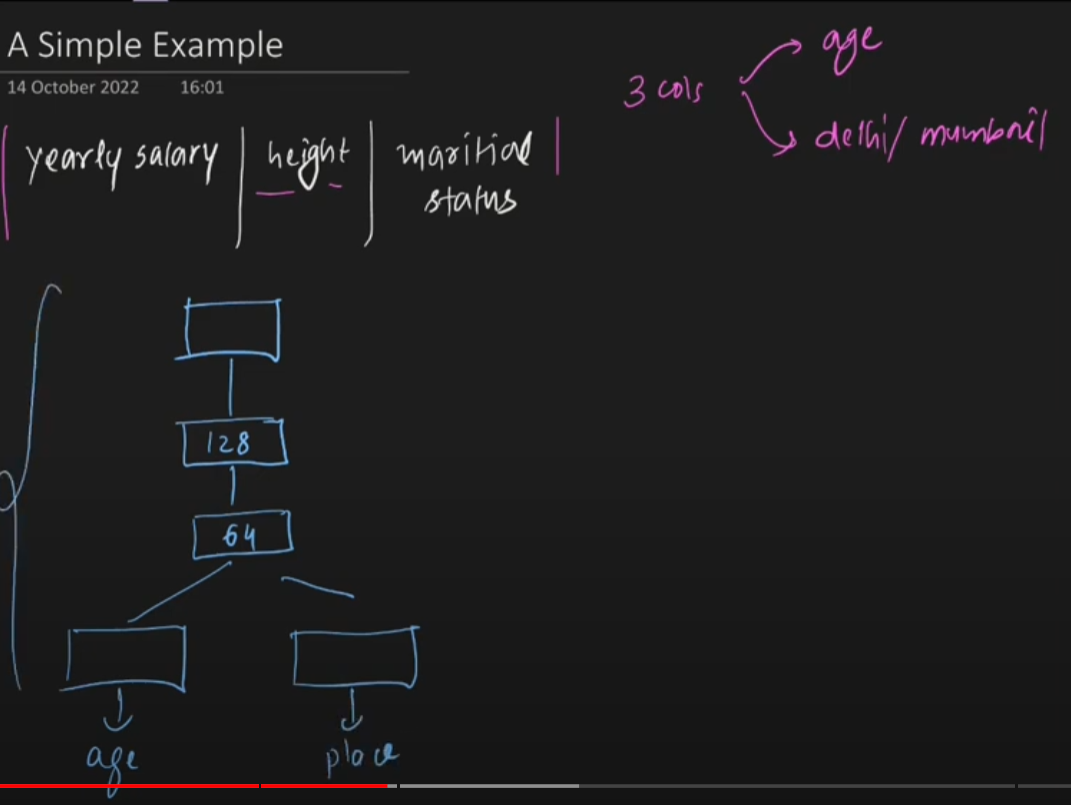

# **Functional API Multiple Outputs**

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense

# **we need to define the input shape that our model will receive**

In [ ]:
x = Input(shape=(3,)) # this line is telling the model that each data point (or row) you will input into the model will have 3 values—one for each column.

# **Defining Model**

In [ ]:
hidden1 = Dense(128,activation='relu')(x)
hidden2 = Dense(64,activation='relu')(hidden1)

output1 = Dense(1,activation='linear')(hidden2) # will tell the age
output2 = Dense(1,activation='sigmoid')(hidden2) # will tell the city

In [ ]:
model = Model(inputs = x , outputs = [output1, output2])

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 3)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │            512 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │          8,256 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             65 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │             65 │ dense_1[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 8,898 (34.76 KB)

 Trainable params: 8,898 (34.76 KB)

 Non-trainable params: 0 (0.00 B)

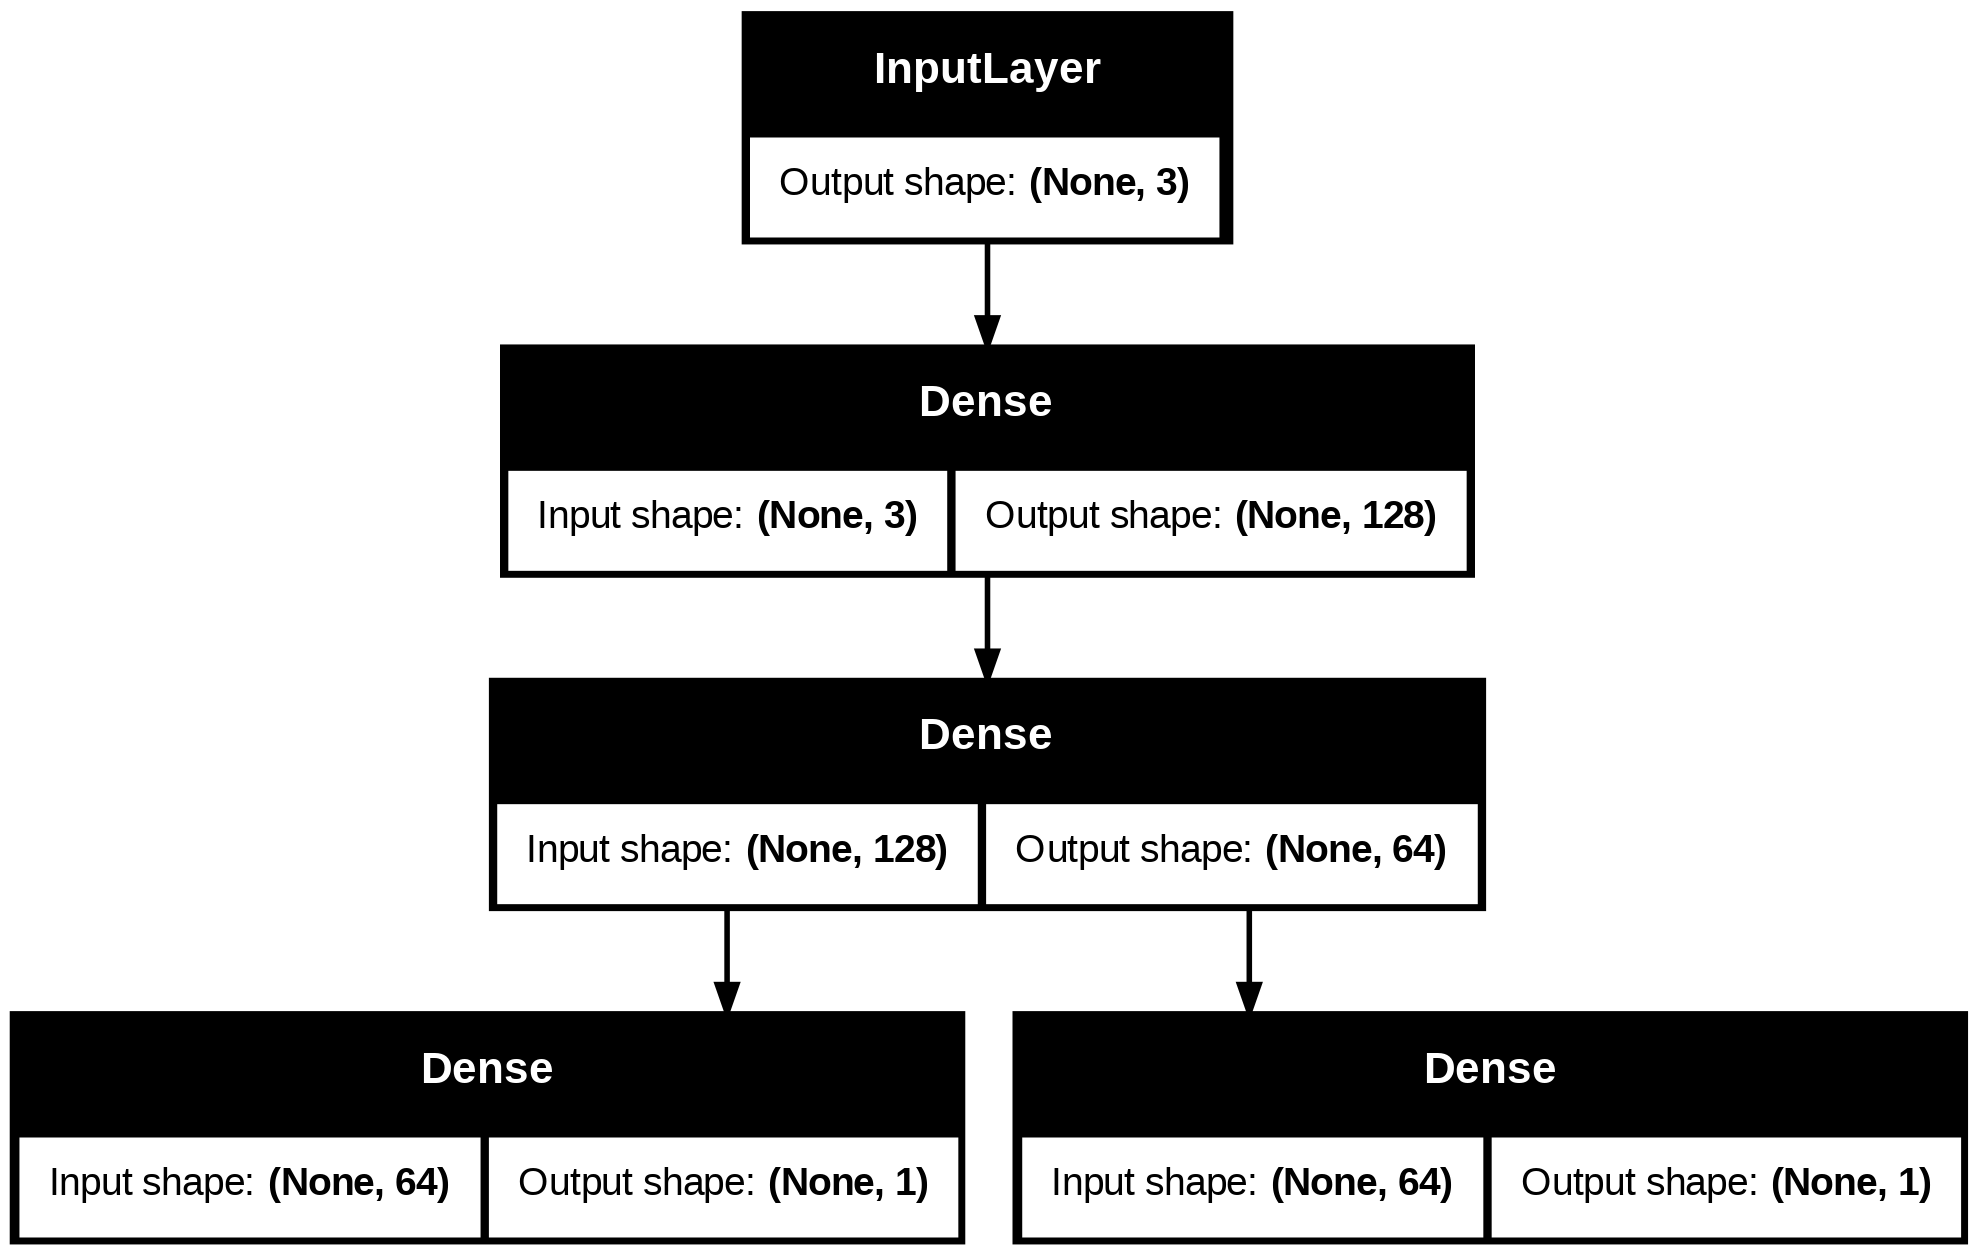

In [ ]:
from keras.utils import plot_model

plot_model(model,show_shapes=True)

# **Functional API Multiple Inputs**

In [ ]:
from keras.layers import Input, Dense, concatenate
from keras.models import Model

In [ ]:
# define two sets of inputs
inputA = Input(shape=(32,))
inputB = Input(shape=(128,))

In [ ]:
# the first branch operates on the first input
x = Dense(8, activation="relu")(inputA)

x1 = Dense(4, activation="relu")(x)

In [ ]:
# the second branch opreates on the second input
y = Dense(64, activation="relu")(inputB)

y1 = Dense(32, activation="relu")(y)
y2 = Dense(4, activation="relu")(y1)

In [ ]:
# combine the output of the two branches
combined = concatenate([x1, y2])

In [ ]:
# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(2, activation="relu")(combined)
z1 = Dense(1, activation="linear")(z)

In [ ]:
# our model will accept the inputs of the two branches and
# then output a single value
model = Model(inputs=[inputA, inputB], outputs=z1)

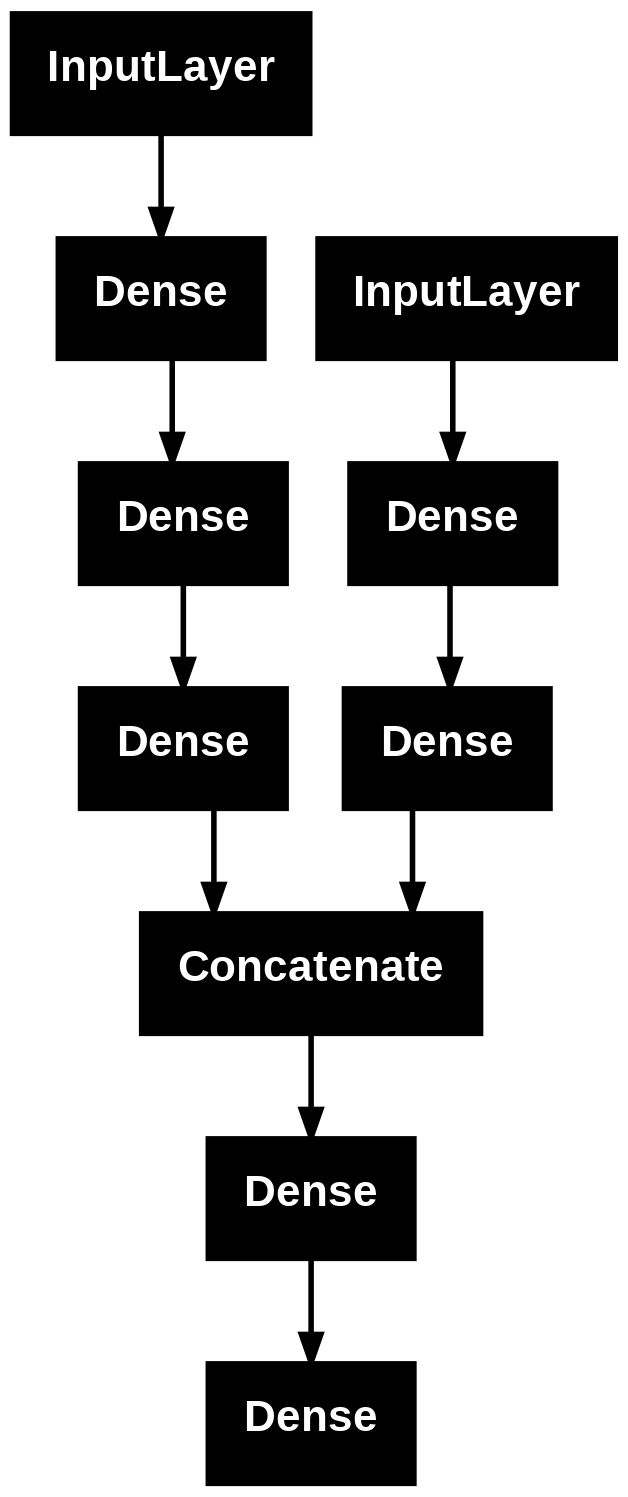

In [ ]:
from keras.utils import plot_model
plot_model(model)